In [702]:
import pylab
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [612]:
from sklearn import cross_validation
from sklearn.cluster import KMeans
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import explained_variance_score
import  statsmodels.api as sm
from sklearn.cross_validation import train_test_split

# Data Import and Preprocessing

In [613]:
df = pd.read_csv("train.csv")


In [614]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [615]:
# year, month, day-of-the-week, time-of-the-day might be useful parameters for  prediction

df['year'] = df['datetime'].str.extract("^(.{4})")


df['month'] = df['datetime'].str.extract("-(.{2})-")


df['day'] = df['datetime'].str.extract("(.{2}) ")


df['time'] = df['datetime'].str.extract(" (.{2})")



C:\Users\liaox\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liaox\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\liaox\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
C:\Users\liaox\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: currently extract(expand=None) means exp

In [616]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04


In [617]:
df[['year', 'month', 'day', 'time']] = df[['year', 'month', 'day', 'time']].astype(int)

In [618]:
#drop the unique datatime column
df = df.drop(labels=["datetime"], axis=1)

In [619]:
df_original=df.copy()

# Clustering

In [620]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

## K-Means Clusering

I cluster the bike sharing demand dataset using K-means method and DBSCAN method

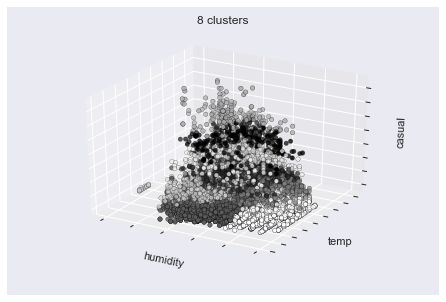

In [708]:

# Fit a k-means estimator
estimator = KMeans(n_clusters=8)
X = df_original[["humidity","temp" ,"casual"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_


#colors = set_colors(labels)
fig = plt.figure()
ax =  Axes3D(fig)
ax.scatter(df_original["humidity"], df_original["temp"], df_original["casual"],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('humidity')
ax.set_ylabel('temp')
ax.set_zlabel('casual')
ax.set_title('8 clusters')
ax.dist = 12
#plt.scatter(df_original["humidity"], df_original["casual"], c=colors)
#plt.xlabel("humidity")
#plt.ylabel("casual")
#plt.show()

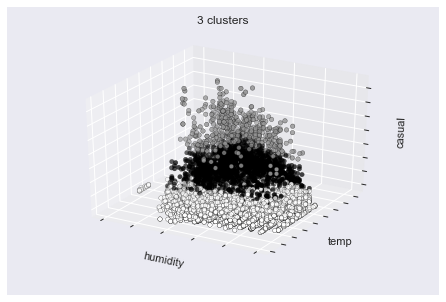

In [709]:

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = df_original[["humidity","temp" ,"casual"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_


#colors = set_colors(labels)
fig = plt.figure()
ax =  Axes3D(fig)
ax.scatter(df_original["humidity"], df_original["temp"], df_original["casual"],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('humidity')
ax.set_ylabel('temp')
ax.set_zlabel('casual')
ax.set_title('3 clusters')
ax.dist = 12
#plt.scatter(df_original["humidity"], df_original["casual"], c=colors)
#plt.xlabel("humidity")
#plt.ylabel("casual")
#plt.show()

## DBSCAN Clustering

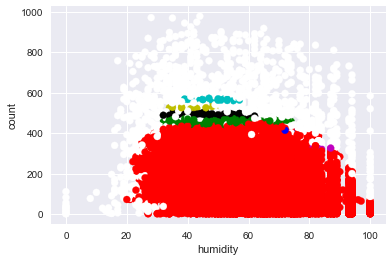

In [719]:
#### from sklearn.cluster import DBSCAN
    #Fit a DBSCAN estimator
estimator = DBSCAN(eps=5, min_samples=10)
X = df_original[["humidity", "count"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
#print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_original["humidity"], df_original["count"], c=colors)
plt.xlabel("humidity")
plt.ylabel("count")
plt.show()

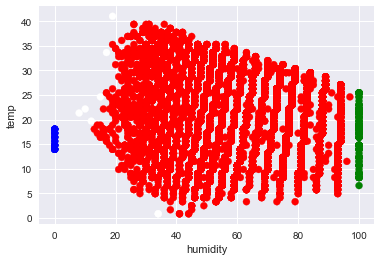

In [721]:
from sklearn.cluster import DBSCAN
    #Fit a DBSCAN estimator
estimator = DBSCAN(eps=3, min_samples=14)
X = df_original[["humidity", "temp"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
#print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_original["humidity"], df_original["temp"], c=colors)
plt.xlabel("humidity")
plt.ylabel("temp")
plt.show()

# Dummy  Variable

In [624]:
df= df.drop(labels=["casual", "registered"], axis=1)

In [625]:
# convert ordinal categorical variables into multiple dummy variables
# get dummy variables for season
df['season'].value_counts() 

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [626]:
df = df.join(pd.get_dummies(df.season, prefix='season'))


In [627]:
df = df.drop(labels=["season"], axis=1)

In [628]:
df['weather'].value_counts() 
df = df.join(pd.get_dummies(df.weather, prefix='weather'))


In [629]:
df= df.drop(labels=["weather"], axis=1)

# Multi-colinearity Analysis
We can see from the above heatmap, atemp variable and temp variable are highly correlated, the correlation coefficent is almost equal to 1. Therefroe, we need to delete one of the varibales to avoid Multi-colinearity Analysis.

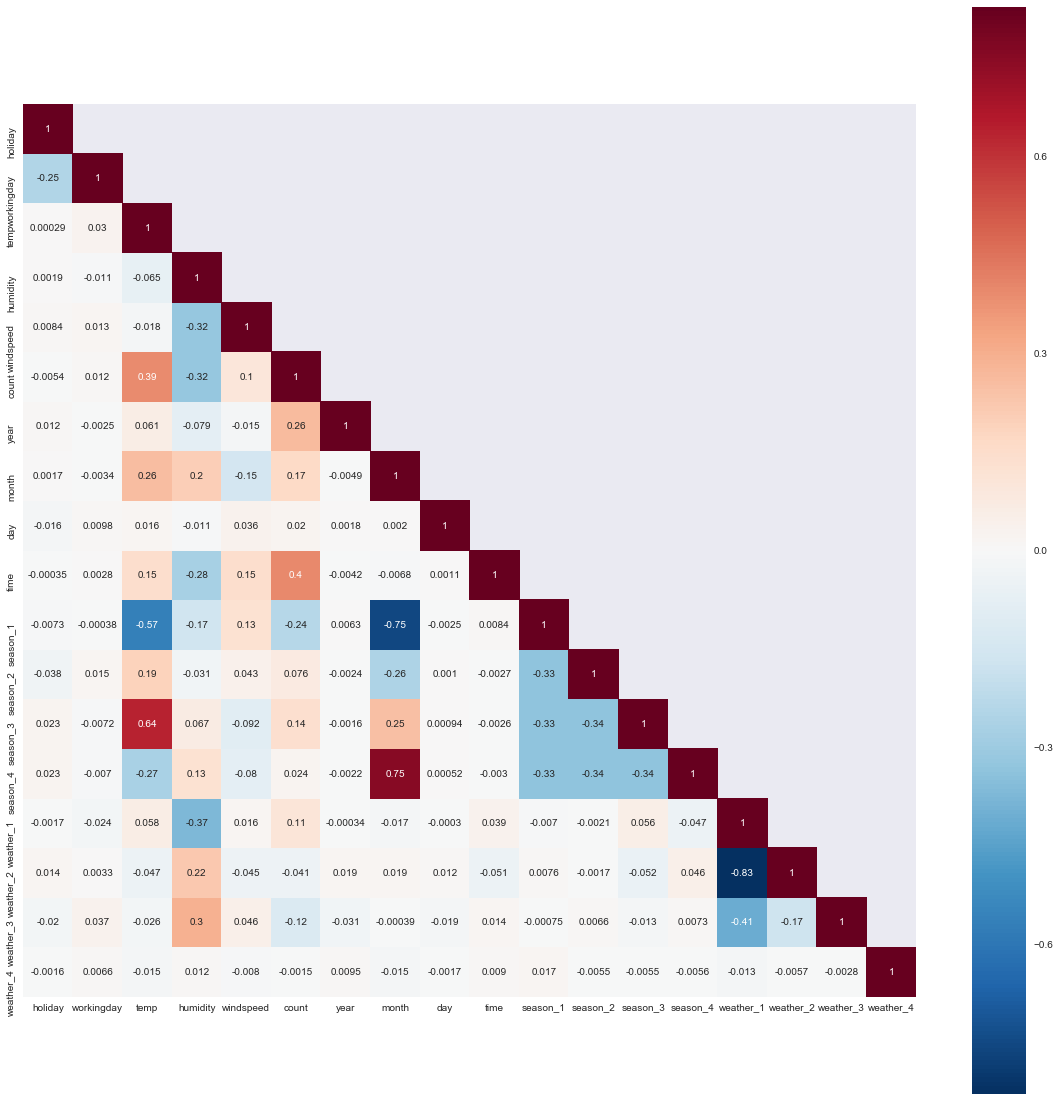

In [634]:
corrmat=df.corr()
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(corrmat, mask=mask,vmax=.8, square=True,annot=True)

In [635]:
df= df.drop(labels=["atemp"], axis=1)

ValueError: labels ['atemp'] not contained in axis

In [636]:
target = df['count'].values
predictors = df.drop(labels=["count"], axis=1)


In [637]:
predictors.shape
#the datset we are going to use as predictor has 17 rows and 10886 colomns
#target is the response array

(10886, 17)

# Linear regression

## Dataset split

In [638]:
#split the df dataset into train and test dataset

predictors=sm.add_constant(predictors)
x_train,x_test,y_train,y_test=train_test_split(predictors,target,test_size=0.2,random_state=1)


## Backward Elimination 

Implement backward elimination to select significant predictors of the linear regression model
We first include all the predictors into the model and fit a full logistic regression, then we elmiminate the predictors step by step accroding to the p-value. If the p-value is larger than the significance level (0.05),we delete the variable form our model. Finally, we get a set of predictors that are  significant:   'const','temp','humidity','windspeed','year','month','time','season_1','season_2','season_3','season_4','weather_1','weather_2','weather_3','weather_4'.
The RMSE of the simple linear regression we fit is 143.90089223868023

In [639]:
x_train_opt=x_train[['const','holiday','workingday','temp','humidity','windspeed','year', 'month','day','time','season_1','season_2','season_3','season_4','weather_1','weather_2','weather_3','weather_4']]
#backward elimination: select a significance level to stay in the model (pvalue<=0.05)
regressor=sm.OLS(endog=y_train,exog=x_train_opt).fit()
#fit the full model with all possible predictors
regressor.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     382.6
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:26:27   Log-Likelihood:                -55379.
No. Observations:                8708   AIC:                         1.108e+05
Df Residuals:                    8692   BIC:                         1.109e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.05e+05   4070.571    -25.798      0.000   -1.13e+05    -9.7e+04
holiday      -14.9761      9.470     -1.581      0.114     -33.539       3.587
workingday    -2.3076      3.326     -0.694      0.488      -8.828       4.213
temp           8.2198      0.333     24.667      0.000       7.567       8.873
humidity      -1.9473      0.098    -19.858      0.000      -2.139      -1.755
windspeed      0.3998      0.197      2.031      0.042       0.014       0.786
year          78.3056      3.035     25.800      0.000      72.356      84.255
month          9.9942      1.863      5.365      0.000       6.343      13.646
day            0.3176      0.274      1.160      0.246      -0.219       0.854
time           7.7700      0.233     33.352      0.000       7.313       8.227
season_1   -2.623e+04   1017.957    -25.770      0.000   -2.82e+04   -2.42e+04
season_2   -2.624e+04   1017.558    -25.786      0.000   -2.82e+04   -2.42e+04
season_3   -2.629e+04   1017.352    -25.840      0.000   -2.83e+04   -2.43e+04
season_4   -2.625e+04   1017.801    -25.792      0.000   -2.82e+04   -2.43e+04
weather_1  -2.626e+04   1017.496    -25.812      0.000   -2.83e+04   -2.43e+04
weather_2  -2.626e+04   1017.654    -25.802      0.000   -2.83e+04   -2.43e+04
weather_3  -2.629e+04   1017.612    -25.839      0.000   -2.83e+04   -2.43e+04
weather_4   -2.62e+04   1025.030    -25.557      0.000   -2.82e+04   -2.42e+04
==============================================================================
Omnibus:                     1726.922   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3359.149
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       4.857   Cond. No.                     1.66e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [640]:
x_train_opt=x_train[['const','holiday','temp','humidity','windspeed','year', 'month','day','time','season_1','season_2','season_3',
                'season_4','weather_1','weather_2','weather_3','weather_4']]

#backward elimination: select a significance level to stay in the model (pvalue<=0.05)
regressor=sm.OLS(endog=y_train,exog=x_train_opt).fit()
#fit the full model with all possible predictors

regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     409.9
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:26:29   Log-Likelihood:                -55380.
No. Observations:                8708   AIC:                         1.108e+05
Df Residuals:                    8693   BIC:                         1.109e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.05e+05   4070.391    -25.802      0.000   -1.13e+05    -9.7e+04
holiday      -13.3685      9.182     -1.456      0.145     -31.367       4.630
temp           8.2098      0.333     24.661      0.000       7.557       8.862
humidity      -1.9456      0.098    -19.848      0.000      -2.138      -1.753
windspeed      0.3985      0.197      2.024      0.043       0.013       0.784
year          78.3160      3.035     25.804      0.000      72.367      84.265
month          9.9996      1.863      5.368      0.000       6.348      13.651
day            0.3148      0.274      1.150      0.250      -0.222       0.851
time           7.7731      0.233     33.373      0.000       7.317       8.230
season_1   -2.624e+04   1017.911    -25.774      0.000   -2.82e+04   -2.42e+04
season_2   -2.624e+04   1017.513    -25.791      0.000   -2.82e+04   -2.42e+04
season_3   -2.629e+04   1017.308    -25.844      0.000   -2.83e+04   -2.43e+04
season_4   -2.626e+04   1017.756    -25.797      0.000   -2.83e+04   -2.43e+04
weather_1  -2.627e+04   1017.453    -25.817      0.000   -2.83e+04   -2.43e+04
weather_2  -2.626e+04   1017.611    -25.806      0.000   -2.83e+04   -2.43e+04
weather_3   -2.63e+04   1017.567    -25.844      0.000   -2.83e+04   -2.43e+04
weather_4   -2.62e+04   1024.980    -25.562      0.000   -2.82e+04   -2.42e+04
==============================================================================
Omnibus:                     1717.178   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3323.565
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       4.840   Cond. No.                     1.86e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [641]:
x_train_opt=x_train[['const','holiday','temp','humidity','windspeed','year', 'month','time','season_1','season_2','season_3',
                'season_4','weather_1','weather_2','weather_3','weather_4']]

#backward elimination: select a significance level to stay in the model (pvalue<=0.05)
regressor=sm.OLS(endog=y_train,exog=x_train_opt).fit()
#fit the full model with all possible predictors

regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     441.3
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:26:31   Log-Likelihood:                -55380.
No. Observations:                8708   AIC:                         1.108e+05
Df Residuals:                    8694   BIC:                         1.109e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.05e+05   4070.451    -25.805      0.000   -1.13e+05   -9.71e+04
holiday      -13.4749      9.181     -1.468      0.142     -31.472       4.523
temp           8.2176      0.333     24.689      0.000       7.565       8.870
humidity      -1.9449      0.098    -19.841      0.000      -2.137      -1.753
windspeed      0.4091      0.197      2.080      0.038       0.024       0.795
year          78.3271      3.035     25.807      0.000      72.378      84.277
month         10.0021      1.863      5.370      0.000       6.351      13.654
time           7.7705      0.233     33.363      0.000       7.314       8.227
season_1   -2.624e+04   1017.926    -25.777      0.000   -2.82e+04   -2.42e+04
season_2   -2.625e+04   1017.528    -25.794      0.000   -2.82e+04   -2.43e+04
season_3    -2.63e+04   1017.323    -25.847      0.000   -2.83e+04   -2.43e+04
season_4   -2.626e+04   1017.771    -25.800      0.000   -2.83e+04   -2.43e+04
weather_1  -2.627e+04   1017.468    -25.819      0.000   -2.83e+04   -2.43e+04
weather_2  -2.626e+04   1017.626    -25.809      0.000   -2.83e+04   -2.43e+04
weather_3   -2.63e+04   1017.582    -25.847      0.000   -2.83e+04   -2.43e+04
weather_4   -2.62e+04   1024.995    -25.565      0.000   -2.82e+04   -2.42e+04
==============================================================================
Omnibus:                     1719.223   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3331.957
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       4.844   Cond. No.                     1.72e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [642]:
x_train_opt=x_train[['const','temp','humidity','windspeed','year', 'month','time','season_1','season_2','season_3',
                'season_4','weather_1','weather_2','weather_3','weather_4']]
#backward elimination: select a significance level to stay in the model (pvalue<=0.05)
regressor=sm.OLS(endog=y_train,exog=x_train_opt).fit()
#fit the full model with all possible predictors

regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     477.8
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:26:32   Log-Likelihood:                -55381.
No. Observations:                8708   AIC:                         1.108e+05
Df Residuals:                    8695   BIC:                         1.109e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.049e+05   4070.258    -25.784      0.000   -1.13e+05    -9.7e+04
temp           8.2205      0.333     24.696      0.000       7.568       8.873
humidity      -1.9478      0.098    -19.873      0.000      -2.140      -1.756
windspeed      0.4008      0.197      2.039      0.042       0.015       0.786
year          78.2590      3.035     25.786      0.000      72.310      84.208
month         10.3104      1.851      5.570      0.000       6.682      13.939
time           7.7698      0.233     33.358      0.000       7.313       8.226
season_1   -2.622e+04   1017.863    -25.755      0.000   -2.82e+04   -2.42e+04
season_2   -2.622e+04   1017.474    -25.773      0.000   -2.82e+04   -2.42e+04
season_3   -2.627e+04   1017.280    -25.827      0.000   -2.83e+04   -2.43e+04
season_4   -2.624e+04   1017.737    -25.780      0.000   -2.82e+04   -2.42e+04
weather_1  -2.625e+04   1017.422    -25.799      0.000   -2.82e+04   -2.43e+04
weather_2  -2.624e+04   1017.580    -25.788      0.000   -2.82e+04   -2.42e+04
weather_3  -2.628e+04   1017.534    -25.826      0.000   -2.83e+04   -2.43e+04
weather_4  -2.618e+04   1024.943    -25.544      0.000   -2.82e+04   -2.42e+04
==============================================================================
Omnibus:                     1725.055   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.110
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       4.854   Cond. No.                     2.19e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

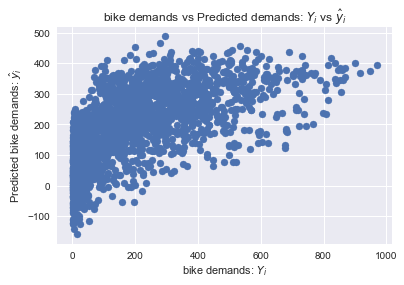

In [643]:
x_test_opt=x_test[['const','temp','humidity','windspeed','year', 'month','time','season_1','season_2','season_3',
                'season_4','weather_1','weather_2','weather_3','weather_4']]
linreg = LinearRegression()
linreg.fit(x_train_opt, y_train)
y_pred = linreg.predict(x_test_opt)

plt.scatter(y_test, y_pred)
plt.xlabel("bike demands: $Y_i$")
plt.ylabel("Predicted bike demands: $\hat{y}_i$")
plt.title("bike demands vs Predicted demands: $Y_i$ vs $\hat{y}_i$")


In [644]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

143.90089223868023

## K-Fold Cross Validation for Linear Regression

In [645]:
predictors_opt=predictors[['const','temp','humidity','windspeed','year', 'month','time','season_1','season_2','season_3',
                'season_4','weather_1','weather_2','weather_3','weather_4']]


In [646]:
#K Fold cross validation
from sklearn.cross_validation import KFold

predictors_opt_np = predictors_opt.as_matrix() #generate new np array datasets:predictors_opt_np and target_np
target_np=target.copy()


In [647]:
kf = KFold(len(predictors_opt_np), n_folds=5)

In [648]:
scores = []
for train_index, test_index in kf:
    linreg.fit(predictors_opt_np[train_index],target_np[train_index])
    scores.append(np.sqrt(metrics.mean_squared_error(target_np[test_index], linreg.predict(predictors_opt_np[test_index]))))
scores

[103.02099392270003,
 119.5083581522899,
 114.78663152648696,
 179.22605753389917,
 183.73604664989338]

In [649]:
np.mean(scores)

140.05561755705389

In [650]:
np.median(scores)

119.5083581522899

In [651]:
np.std(scores)

34.277042245538361

In [652]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [653]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 143.901
RMSE on 5-fold CV: 140.056


The RMSE on no CV training is bigger than the RMSE on 5-fold CV.
We can conclude that the linear regression fits better with K-fold cross validation.

## Regularization of linear regression

In [654]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(x_train_opt,y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

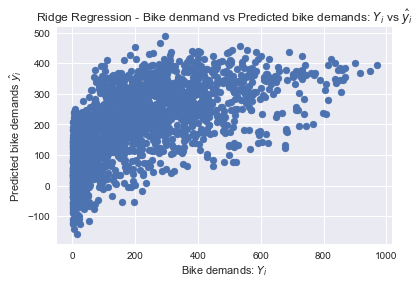

In [655]:
y_pred_ridge = ridge.predict(x_test_opt)
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Bike demands: $Y_i$")
plt.ylabel("Predicted bike demands $\hat{y}_i$")
plt.title("Ridge Regression - Bike denmand vs Predicted bike demands: $Y_i$ vs $\hat{y}_i$")

In [656]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
rmse

143.90080942485781

## K-Fold Cross-validation for Ridge Linear Regression

In [657]:
kf = KFold(len(predictors_opt_np), n_folds=5)

In [658]:
scores = []
for train_index, test_index in kf:
    ridge.fit(predictors_opt_np[train_index],target_np[train_index])
    scores.append(np.sqrt(metrics.mean_squared_error(target_np[test_index], linreg.predict(predictors_opt_np[test_index]))))
scores

[87.191572593295021,
 118.85514939125893,
 111.18783322236276,
 178.17901254347385,
 183.73604664989338]

In [659]:
np.mean(scores)

135.82992288005678

## The Choice of Alpha in Ridge Regression

In [660]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])
for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a) 
    # computing the RMSE on training data
    ridge.fit(x_train_opt,y_train)
    y_pred = ridge.predict(x_test_opt)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(predictors_opt_np), n_folds=5)
    xval_err = 0
    for train, test in kf:
        ridge.fit(predictors_opt_np[train], target_np[train])
        y_pred = ridge.predict(predictors_opt_np[test])
        err = y_pred - target_np[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(predictors_opt_np))
    t_rmse=np.append(t_rmse, [rmse_train])
    cv_rmse=np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))


Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 143.9009		 144.1858
0.418	 143.9008		 144.1832
0.826	 143.9008		 144.1810
1.234	 143.9009		 144.1789
1.642	 143.9010		 144.1770
2.050	 143.9011		 144.1751
2.458	 143.9012		 144.1733
2.866	 143.9014		 144.1715
3.274	 143.9015		 144.1698
3.682	 143.9017		 144.1680
4.090	 143.9019		 144.1664
4.498	 143.9020		 144.1647
4.906	 143.9022		 144.1630
5.313	 143.9024		 144.1614
5.721	 143.9026		 144.1598
6.129	 143.9028		 144.1582
6.537	 143.9029		 144.1567
6.945	 143.9031		 144.1551
7.353	 143.9033		 144.1536
7.761	 143.9035		 144.1520
8.169	 143.9037		 144.1505
8.577	 143.9040		 144.1490
8.985	 143.9042		 144.1476
9.393	 143.9044		 144.1461
9.801	 143.9046		 144.1446
10.209	 143.9048		 144.1432
10.617	 143.9050		 144.1418
11.025	 143.9053		 144.1403
11.433	 143.9055		 144.1389
11.841	 143.9057		 144.1375
12.249	 143.9059		 144.1362
12.657	 143.9062		 144.1348
13.065	 143.9064		 144.1334
13.473	 143.9067		 144.1321
13.881	 143.9069		 144.1307


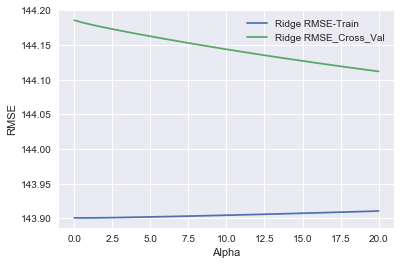

In [661]:
import pylab as pl
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

# logistic regression

In [662]:
predictors
target

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [663]:
columns=['count']
target_bi=pd.DataFrame(target,columns=columns)


In [664]:
# Create a binary response from the numerical response
# The binary response is 1 when the count response is larger than the median
#The binary response is 0 when the count response is smaller than the median

from statistics import median
target_bi['target_bi'] = np.zeros(len(target_bi))
target_bi.loc[df['count'] <= median(np.array(target_df['count'])), 'target_bi'] = 0
target_bi.loc[df['count'] > median(np.array(target_df['count'])), 'target_bi'] = 1

target_bi['target_bi'] =target_bi['target_bi'] .astype('category')
target_bi

,count,target_bi
0,16,0.0
1,40,0.0
2,32,0.0
3,13,0.0
4,1,0.0
5,1,0.0
6,2,0.0
7,3,0.0
8,8,0.0
9,14,0.0


##  Dataset Split

In [665]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(predictors, target_bi, test_size= .2, random_state=0)
y_train_log=y_train_log['target_bi'].values
y_test_log=y_test_log['target_bi'].values

## Forward Stepwise-variable select

We add variables to our logistic model step by step according to the accuracy rate of the model.
First we compare the accuracy rate of each model with one variable as the predictors and add the varibale with largest accuacy rate into our model. Then we add variables into the model with the predictor we select last step. We will stop the process when the  maximum accuracy rate is no longer larger than the maximum accuracy rate of last step.

The predictor we select are: 'time','temp','season_4','humidity','weather_3','season_2','year'.


In [666]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
def caculate_auc(features):
    X_full = np.array(x_train_log[features])
    Y_full = np.array(y_train_log)
    
    logit = LogisticRegression()
    res_logit = logit.fit(X_full, Y_full)
    Y_pred_full = res_logit.predict(X_full)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_full, Y_pred_full)
    return auc(false_positive_rate, true_positive_rate)

In [667]:
features = list(predictors.columns)
print(features)

['const', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'time', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4']


In [668]:
# first round iteration
for p in features:
    auc_res = caculate_auc([p])
    print([p], auc_res)
    
#pick the highest value "time"

['const'] 0.5
['holiday'] 0.5
['workingday'] 0.516288462695
['temp'] 0.652491218852
['humidity'] 0.62653536885
['windspeed'] 0.545472683745
['year'] 0.5
['month'] 0.577839536849
['day'] 0.504007674866
['time'] 0.709528060107
['season_1'] 0.605311579087
['season_2'] 0.527472042238
['season_3'] 0.553720157549
['season_4'] 0.5241193793
['weather_1'] 0.543910066693
['weather_2'] 0.510799203181
['weather_3'] 0.533226872793
['weather_4'] 0.500116009281


In [669]:
features.remove('time')
print(features)

['const', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4']


In [670]:
# second round iteration
for p in predictors:
    pred_sec = ['time']
    pred_sec.append(p)
    auc_res = caculate_auc(pred_sec)
    print(pred_sec, auc_res)
    
    #pick 'temp'

['time', 'const'] 0.709528060107
['time', 'holiday'] 0.708483976581
['time', 'workingday'] 0.698133616947
['time', 'temp'] 0.746281899914
['time', 'humidity'] 0.71552345561
['time', 'windspeed'] 0.701646392739
['time', 'year'] 0.709528060107
['time', 'month'] 0.727917667702
['time', 'day'] 0.707894645214
['time', 'time'] 0.709528060107
['time', 'season_1'] 0.727551069934
['time', 'season_2'] 0.700467730006
['time', 'season_3'] 0.717996737602
['time', 'season_4'] 0.698300640768
['time', 'weather_1'] 0.708333148689
['time', 'weather_2'] 0.709528060107
['time', 'weather_3'] 0.710024436334
['time', 'weather_4'] 0.709528060107


In [671]:
features.remove('temp')
print(features)

['const', 'holiday', 'workingday', 'humidity', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4']


In [672]:
# third round iteration
for p in features:
    pred_third = ['time','temp']
    pred_third.append(p)
    auc_res = caculate_auc(pred_third)
    print(pred_third, auc_res)
    
   #pick 'season_4'

['time', 'temp', 'const'] 0.746281899914
['time', 'temp', 'holiday'] 0.746163569393
['time', 'temp', 'workingday'] 0.746165890634
['time', 'temp', 'humidity'] 0.761532398717
['time', 'temp', 'windspeed'] 0.747885138678
['time', 'temp', 'year'] 0.746281899914
['time', 'temp', 'month'] 0.764734233764
['time', 'temp', 'day'] 0.746281899914
['time', 'temp', 'season_1'] 0.758859542779
['time', 'temp', 'season_2'] 0.746281899914
['time', 'temp', 'season_3'] 0.751973265638
['time', 'temp', 'season_4'] 0.770908206536
['time', 'temp', 'weather_1'] 0.746994151528
['time', 'temp', 'weather_2'] 0.746377018029
['time', 'temp', 'weather_3'] 0.754982543215
['time', 'temp', 'weather_4'] 0.746281899914


In [673]:
features.remove('season_4')
print(features)

['const', 'holiday', 'workingday', 'humidity', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2', 'weather_3', 'weather_4']


In [674]:
# forth round iteration
for p in features:
    pred_forth = ['time','temp','season_4']
    pred_forth.append(p)
    auc_res = caculate_auc(pred_forth)
    print(pred_forth, auc_res)
    
  #remove 'humidity'

['time', 'temp', 'season_4', 'const'] 0.770908206536
['time', 'temp', 'season_4', 'holiday'] 0.771713307779
['time', 'temp', 'season_4', 'workingday'] 0.770796839736
['time', 'temp', 'season_4', 'humidity'] 0.778720236682
['time', 'temp', 'season_4', 'windspeed'] 0.771516107828
['time', 'temp', 'season_4', 'year'] 0.770908206536
['time', 'temp', 'season_4', 'month'] 0.7706947579
['time', 'temp', 'season_4', 'day'] 0.771258555619
['time', 'temp', 'season_4', 'season_1'] 0.770216793333
['time', 'temp', 'season_4', 'season_2'] 0.77720515231
['time', 'temp', 'season_4', 'season_3'] 0.772402399741
['time', 'temp', 'season_4', 'weather_1'] 0.771924435174
['time', 'temp', 'season_4', 'weather_2'] 0.7706947579
['time', 'temp', 'season_4', 'weather_3'] 0.778469648195
['time', 'temp', 'season_4', 'weather_4'] 0.770908206536


In [675]:
features.remove('humidity')
print(features)

['const', 'holiday', 'workingday', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2', 'weather_3', 'weather_4']


In [676]:
# fifth round iteration
for p in features:
    pred_fifth = ['time','temp','season_4','humidity']
    pred_fifth.append(p)
    auc_res = caculate_auc(pred_fifth)
    print(pred_fifth, auc_res)
    
  #remove 'weather_3'

['time', 'temp', 'season_4', 'humidity', 'const'] 0.778604227401
['time', 'temp', 'season_4', 'humidity', 'holiday'] 0.77848589688
['time', 'temp', 'season_4', 'humidity', 'workingday'] 0.779407007404
['time', 'temp', 'season_4', 'humidity', 'windspeed'] 0.778717915441
['time', 'temp', 'season_4', 'humidity', 'year'] 0.778028823479
['time', 'temp', 'season_4', 'humidity', 'month'] 0.779759677727
['time', 'temp', 'season_4', 'humidity', 'day'] 0.778717915441
['time', 'temp', 'season_4', 'humidity', 'season_1'] 0.781242264729
['time', 'temp', 'season_4', 'humidity', 'season_2'] 0.782634376098
['time', 'temp', 'season_4', 'humidity', 'season_3'] 0.780794476291
['time', 'temp', 'season_4', 'humidity', 'weather_1'] 0.78010770557
['time', 'temp', 'season_4', 'humidity', 'weather_2'] 0.782400036296
['time', 'temp', 'season_4', 'humidity', 'weather_3'] 0.783272400764
['time', 'temp', 'season_4', 'humidity', 'weather_4'] 0.778720236682


In [677]:
features.remove('weather_3')
print(features)

['const', 'holiday', 'workingday', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2', 'weather_4']


In [678]:
# sixth round iteration
for p in features:
    pred_sixth = ['time','temp','season_4','humidity','weather_3']
    pred_sixth.append(p)
    auc_res = caculate_auc(pred_sixth)
    print(pred_sixth, auc_res)
    
  #remove 'season_2'

['time', 'temp', 'season_4', 'humidity', 'weather_3', 'const'] 0.783158712724
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'holiday'] 0.783154070243
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'workingday'] 0.784873318287
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'windspeed'] 0.783149427761
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'year'] 0.783267758283
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'month'] 0.78280372116
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'day'] 0.783499776844
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_1'] 0.785212061167
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2'] 0.789000906339
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_3'] 0.786483520774
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'weather_1'] 0.784789806377
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'weather_2'] 0.784903494417
['time', 'temp', 'season_4', 'humidity',

In [679]:
features.remove('season_2')
print(features)

['const', 'holiday', 'workingday', 'windspeed', 'year', 'month', 'day', 'season_1', 'season_3', 'weather_1', 'weather_2', 'weather_4']


In [680]:
# seventh round iteration
for p in features:
    pred_seventh = ['time','temp','season_4','humidity','weather_3','season_2']
    pred_seventh.append(p)
    auc_res = caculate_auc(pred_seventh)
    print(pred_seventh, auc_res)
    
  #remove 'season_3'

['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'const'] 0.788773530259
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'holiday'] 0.788541511697
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'workingday'] 0.786360547771
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'windspeed'] 0.788318778099
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'year'] 0.7887758515
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'month'] 0.786344299086
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'day'] 0.788773530259
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_1'] 0.78866216346
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3'] 0.788200447577
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'weather_1'] 0.78616334782
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'weather_2'] 0.78639

In [681]:
features.remove('season_3')
print(features)

['const', 'holiday', 'workingday', 'windspeed', 'year', 'month', 'day', 'season_1', 'weather_1', 'weather_2', 'weather_4']


In [682]:
# eighth round iteration
for p in features:
    pred_eighth = ['time','temp','season_4','humidity','weather_3','season_2','season_3']
    pred_eighth.append(p)
    auc_res = caculate_auc(pred_eighth)
    print(pred_eighth, auc_res)
    
  #remove 'year'

['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'const'] 0.788198126337
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'holiday'] 0.788084438297
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'workingday'] 0.786485842014
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'windspeed'] 0.788091402019
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year'] 0.787966107775
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'month'] 0.787629686137
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'day'] 0.787973071497
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'season_1'] 0.788425502417
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'weather_1'] 0.786511375662
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', '

In [683]:
features.remove('year')
print(features)

['const', 'holiday', 'workingday', 'windspeed', 'month', 'day', 'season_1', 'weather_1', 'weather_2', 'weather_4']


In [684]:
# ninth round iteration
for p in features:
    pred_ninth = ['time','temp','season_4','humidity','weather_3','season_2','season_3','year']
    pred_ninth.append(p)
    auc_res = caculate_auc(pred_ninth)
    print(pred_ninth, auc_res)
  # None of the result is greater than the maximum in the ninth iteration result.
#So we can conclude the best predictor combination is
#['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year',]  

['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'const'] 0.787618079933
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'holiday'] 0.788195805096
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'workingday'] 0.787738731695
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'windspeed'] 0.787736410454
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'month'] 0.787852419735
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'day'] 0.787966107775
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'season_1'] 0.787158685291
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'weather_1'] 0.786158705339
['time', 'temp', 'season_4', 'humidity', 'weather_3', 'season_2', 'season_3', 'year', 'weather_2'] 0.786

In [685]:
_features=['time','temp','season_4','humidity','weather_3','season_2','season_3','year']
x_train_log=x_train_log[_features]
x_test_log=x_test_log[_features]
x_train_log['intercept'] = 1.0
x_test_log['intercept'] = 1.0
predictors_log=predictors[_features]
predictors_log['intercept']=1.0

## Significance Analysis
From the summary of the logisic regression, we can see that the p_value of the season_3 variable is quite large. So we can make a conclusion that the season_3 variable is not siginificant. We need to delete the variable from our logistic model.

In [686]:

log_model = sm.Logit(y_train_log, x_train_log).fit()
log_model.summary()


Optimization terminated successfully.
         Current function value: 0.463547
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8708
Model:                          Logit   Df Residuals:                     8699
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                  0.3312
Time:                        20:27:37   Log-Likelihood:                -4036.6
converged:                       True   LL-Null:                       -6035.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
time           0.1316      0.004     30.129      0.000       0.123       0.140
temp           0.1444      0.007     22.104      0.000       0.132       0.157
season_4       1.3873      0.086     16.111      0.000       1.219       1.556
humidity      -0.0300      0.002    -17.893      0.000      -0.033      -0.027
weather_3     -0.8432      0.113     -7.460      0.000      -1.065      -0.622
season_2       0.3956      0.102      3.873      0.000       0.195       0.596
season_3      -0.0124      0.129     -0.096      0.923      -0.265       0.241
year           0.9626      0.057     16.946      0.000       0.851       1.074
intercept  -1939.1752    114.274    -16.970      0.000   -2163.148   -1715.203
==============================================================================
"""

In [687]:
x_train_log=x_train_log.drop('season_3', axis=1)
x_test_log=x_test_log.drop('season_3',axis=1)

In [688]:
lr = LogisticRegression(C=1e9)

# Logistic regression metrics
LRm = lr.fit(x_train_log, y_train_log)

LRm.predict_proba(x_test_log) 

array([[ 0.19522038,  0.80477962],
       [ 0.34444245,  0.65555755],
       [ 0.46428213,  0.53571787],
       ..., 
       [ 0.03005668,  0.96994332],
       [ 0.48390029,  0.51609971],
       [ 0.89139799,  0.10860201]])

In [689]:

LRm.coef_

array([[ 0.12193465,  0.14116529,  1.36081047, -0.03088229, -0.7887295 ,
         0.3928865 , -0.00137333, -0.00427515]])

In [690]:
LRm.intercept_

array([-0.00427515])

In [691]:

LRm.decision_function(x_test_log) # Predict confidence scores for samples.

array([ 1.41643942,  0.64355907,  0.14311525, ...,  3.47415263,
        0.06442112, -2.10510111])

In [692]:
y_pred=LRm.predict(x_test_log)

## Confusion Matrix

In [693]:
confusion_matrix(y_test_log, y_pred)

array([[850, 204],
       [243, 881]], dtype=int64)

In [694]:
# Accuracy, precision and recall
print("Accuracy full:", np.round(accuracy_score(y_test_log, y_pred), 3))
print("Precision full:", np.round(precision_score(y_test_log, y_pred), 3))
print("Recall full:", np.round(recall_score(y_test_log, y_pred), 3))

Accuracy full: 0.795
Precision full: 0.812
Recall full: 0.784


## K-Fold Cross-Validation of Logistic Regression

In [695]:
#cross validation
k=5
acc=[]
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(predictors_log, target_bi, test_size= 0.2, random_state=i)
    # Logistic regression metric
    LRm = lr.fit(x_train, y_train['target_bi'])
    a=metrics.accuracy_score(y_test['target_bi'], LRm.predict(x_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.79568411386593207, 0.78512396694214881, 0.80348943985307619, 0.79292929292929293, 0.79384756657483935]
0.794214876033
0.00587551635374
